## 01_generate_data

In [2]:
import json

def open_json(file):
    with open(file, "r") as f:
        dataset = []
        for line in f:
            dataset.append(json.loads(line.strip()))
    return dataset

In [3]:
file = "/groups/gch51650/kawahara_lab/enomoto/self-correct/Delta-PRM/data/numinamath_gen_2k.jsonl"
dataset = open_json(file)

In [19]:
import re

sum_lines = 0
for data in dataset:
    generated_paths = data["generated_paths"]
    for path in generated_paths:
        #sum_lines += sum(1 for line in path.splitlines() if line.strip())
        sum_lines += len([b for b in re.split(r'\n\s*\n', path) if b.strip()])

print(sum_lines/len(dataset)/8)

10.808125


In [43]:
print(dataset[15]["generated_paths"][0])

First, we calculate the sum of the even numbers in the numerator of the first fraction and the sum of the odd numbers in the denominator:

\[
2 + 4 + 6 + 8 = 20
\]
\[
1 + 3 + 5 + 7 = 16
\]

So the given expression becomes:

\[
\frac{20}{16} - \frac{16}{20}
\]

We can simplify each fraction:

\[
\frac{20}{16} = \frac{5}{4}
\]
\[
\frac{16}{20} = \frac{4}{5}
\]

Now, we need to subtract these two fractions. To do this, we find a common denominator, which is 20:

\[
\frac{5}{4} = \frac{5 \cdot 5}{4 \cdot 5} = \frac{25}{20}
\]
\[
\frac{4}{5} = \frac{4 \cdot 4}{5 \cdot 4} = \frac{16}{20}
\]

So the expression becomes:

\[
\frac{25}{20} - \frac{16}{20} = \frac{25 - 16}{20} = \frac{9}{20}
\]

The fraction \(\frac{9}{20}\) is already in its simplest form, so \(m = 9\) and \(n = 20\). Therefore, \(10m + n\) is:

\[
10 \cdot 9 + 20 = 90 + 20 = 110
\]

The final answer is:

\[
\boxed{110}
\]


--- 統計情報 ---
平均段落数: 10.81
中央値: 9.0
最大: 75, 最小: 1
総サンプル数: 16000


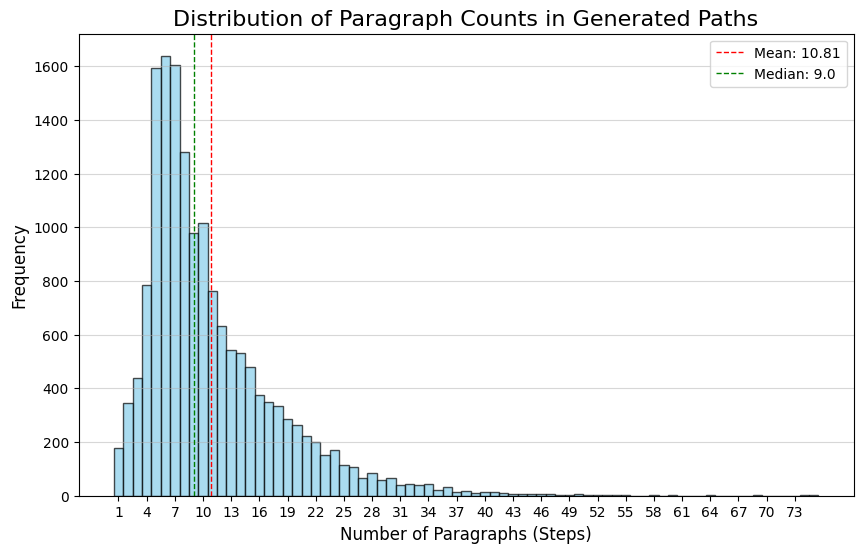

In [21]:
# 生成されたテキストの分析統計

import re
import matplotlib.pyplot as plt
import statistics

# dataset は既にロードされている前提とします
# dataset = [...] 

paragraph_counts = []

# 1. データ収集
for data in dataset:
    generated_paths = data["generated_paths"]
    for path in generated_paths:
        # ユーザー様の指定されたロジック（空行区切りのブロック数）
        blocks = [b for b in re.split(r'\n\s*\n', path) if b.strip()]
        paragraph_counts.append(len(blocks))

# 2. 統計量の計算
mean_val = statistics.mean(paragraph_counts)
median_val = statistics.median(paragraph_counts)
max_val = max(paragraph_counts)
min_val = min(paragraph_counts)

print(f"--- 統計情報 ---")
print(f"平均段落数: {mean_val:.2f}")
print(f"中央値: {median_val}")
print(f"最大: {max_val}, 最小: {min_val}")
print(f"総サンプル数: {len(paragraph_counts)}")

# 3. ヒストグラムの描画
plt.figure(figsize=(10, 6))

# ビン（棒）の設定: 最小値から最大値までの整数刻み
bins = range(min_val, max_val + 2)

plt.hist(paragraph_counts, bins=bins, color='skyblue', edgecolor='black', alpha=0.7, align='left')

# グラフの装飾
plt.title('Distribution of Paragraph Counts in Generated Paths', fontsize=16)
plt.xlabel('Number of Paragraphs (Steps)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_val}')
plt.legend()
plt.grid(axis='y', alpha=0.5)

# 軸の目盛りを整数にする
plt.xticks(range(min_val, max_val + 1, max(1, (max_val - min_val) // 20))) 

plt.show()

## 02_annotate

In [44]:
file = "/groups/gch51650/kawahara_lab/enomoto/self-correct/Delta-PRM/data/annotated_train_data_v1.jsonl"
dataset = open_json(file)

In [58]:
dataset[34]

{'source_id': 224708,
 'source': 'cn_k12',
 'problem': 'Arrange the numbers 1, 1, 2, 2, 3, 3 into three rows and two columns, with the requirement that the numbers in each row are different from each other, and the numbers in each column are also different from each other. The total number of different arrangements is (\u3000\u3000)  \nA: 12  \nB: 18  \nC: 24  \nD: 36',
 'step_text': '\\[\n   3! = 3 \\times 2 \\times 1 = 6\n   \\]',
 'full_text': 'Arrange the numbers 1, 1, 2, 2, 3, 3 into three rows and two columns, with the requirement that the numbers in each row are different from each other, and the numbers in each column are also different from each other. The total number of different arrangements is (\u3000\u3000)  \nA: 12  \nB: 18  \nC: 24  \nD: 36\nTo solve the problem of arranging the numbers 1, 1, 2, 2, 3, 3 into three rows and two columns such that the numbers in each row are different from each other and the numbers in each column are also different from each other, we can

Loading data from data/annotated_train_data.jsonl...


Processing: 100%|██████████| 138249/138249 [00:01<00:00, 130098.81it/s]



Label Distribution Stats
Total Samples: 138249

[Correct Outcome Paths]
  Count: 54411 (39.4%)
  Mean Label: 0.9429
  Std Dev:    0.3646

[Incorrect Outcome Paths]
  Count: 83838 (60.6%)
  Mean Label: -0.0120
  Std Dev:    0.1686

Graph saved to data/label_distribution.png


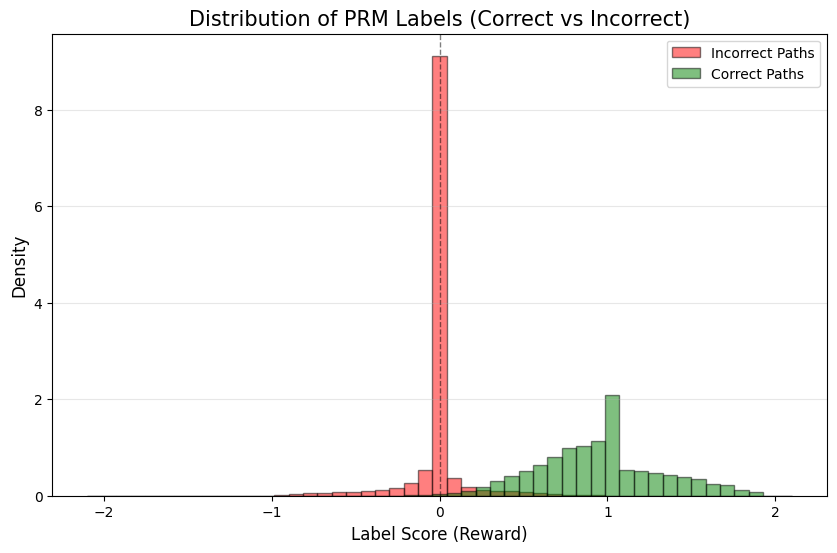

In [61]:
# ラベルの分布をグラフ化

import json
import os
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# ==========================================
# 設定
# ==========================================
INPUT_FILE = "data/annotated_train_data.jsonl"
OUTPUT_IMAGE = "data/label_distribution.png"

def main():
    if not os.path.exists(INPUT_FILE):
        print(f"Error: {INPUT_FILE} not found.")
        return

    print(f"Loading data from {INPUT_FILE}...")

    correct_labels = []
    incorrect_labels = []
    
    # 統計用
    total_count = 0
    
    with open(INPUT_FILE, "r", encoding="utf-8") as f:
        # 行数カウント（tqdm用）
        lines = f.readlines()
        
        for line in tqdm(lines, desc="Processing"):
            try:
                record = json.loads(line)
                label = record["label"]
                is_correct = record["is_outcome_correct"]
                
                if is_correct:
                    correct_labels.append(label)
                else:
                    incorrect_labels.append(label)
                
                total_count += 1
            except:
                continue

    # ==========================================
    # 統計情報の表示
    # ==========================================
    print("\n" + "="*30)
    print("Label Distribution Stats")
    print("="*30)
    
    print(f"Total Samples: {total_count}")
    
    # 正解データの統計
    if correct_labels:
        c_mean = np.mean(correct_labels)
        c_std = np.std(correct_labels)
        print(f"\n[Correct Outcome Paths]")
        print(f"  Count: {len(correct_labels)} ({len(correct_labels)/total_count:.1%})")
        print(f"  Mean Label: {c_mean:.4f}")
        print(f"  Std Dev:    {c_std:.4f}")
    else:
        print("\n[Correct Outcome Paths]: None")

    # 不正解データの統計
    if incorrect_labels:
        i_mean = np.mean(incorrect_labels)
        i_std = np.std(incorrect_labels)
        print(f"\n[Incorrect Outcome Paths]")
        print(f"  Count: {len(incorrect_labels)} ({len(incorrect_labels)/total_count:.1%})")
        print(f"  Mean Label: {i_mean:.4f}")
        print(f"  Std Dev:    {i_std:.4f}")
    else:
        print("\n[Incorrect Outcome Paths]: None")

    # ==========================================
    # ヒストグラムの描画
    # ==========================================
    plt.figure(figsize=(10, 6))
    
    # ビンの設定 (-2.0 から 2.0 まで 50分割)
    bins = np.linspace(-2.1, 2.1, 50)
    
    # 不正解データのプロット (赤)
    plt.hist(incorrect_labels, bins=bins, alpha=0.5, label='Incorrect Paths', 
             color='red', edgecolor='black', density=True)
    
    # 正解データのプロット (緑)
    plt.hist(correct_labels, bins=bins, alpha=0.5, label='Correct Paths', 
             color='green', edgecolor='black', density=True)

    # 装飾
    plt.title('Distribution of PRM Labels (Correct vs Incorrect)', fontsize=15)
    plt.xlabel('Label Score (Reward)', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.axvline(0, color='black', linestyle='--', linewidth=1, alpha=0.5)
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    
    # 保存
    plt.savefig(OUTPUT_IMAGE)
    print(f"\nGraph saved to {OUTPUT_IMAGE}")
    # plt.show() # GUI環境ならコメントアウトを外す

if __name__ == "__main__":
    main()

In [ ]:
def clean_text_for_prm(text):
    """
    Generatorが生成したチャット形式のテキストから、
    PRM学習時(Raw形式)に不要なタグを削除して整形する。
    正規表現を使用して、改行やスペースの揺らぎを吸収する。
    """
    # 1. Systemプロンプト部分を丸ごと削除
    # <|im_start|>system ... <|im_end|> までを削除
    text = re.sub(r"<\|im_start\|>system.*?<\|im_end\|>\s*", "", text, flags=re.DOTALL)
    
    # 2. Userタグを削除
    # "<|im_start|>user" の後の改行も含めて削除
    text = re.sub(r"<\|im_start\|>user\s*", "", text)
    
    # 3. ProblemとAssistantのつなぎ目を「改行1つ」に統一
    # "<|im_end|> (改行) <|im_start|>assistant (改行)" のパターンを全て "\n" に置換
    text = re.sub(r"<\|im_end\|>\s*<\|im_start\|>assistant\s*", "\n", text)
    
    # 4. 文末のタグ削除
    text = re.sub(r"<\|im_end\|>\s*$", "", text)
    
    # 5. 万が一残ってしまったタグの残骸を削除（安全策）
    text = text.replace("<|im_start|>assistant", "")
    text = text.replace("<|im_end|>", "")
    
    return text.strip()

In [ ]:
# テスト用ダミーテキスト（Qwenが吐きそうな文字列）
dummy_input = """<|im_start|>system
Please reason step by step.<|im_end|>
<|im_start|>user
Solve 2x+3=7.<|im_end|>
<|im_start|>assistant
Step 1: Subtract 3 from both sides.
2x = 4
Step 2: Divide by 2.
x = 2<|im_end|>"""

# クリーニング実行
cleaned = clean_text_for_prm(dummy_input)

print("=== クリーニング結果確認 ===")
print(cleaned)
print("========================")

# ★期待される出力（これになっていればOK）
# Solve 2x+3=7.
# Step 1: Subtract 3 from both sides.
# 2x = 4
# Step 2: Divide by 2.
# x = 2

In [2]:
import os
import json
import glob
import numpy as np
import pandas as pd
import argparse

def calculate_metrics_for_single_file(file_path):
    """
    1つのJSONファイルを読み込み、シード値、Majority Vote、pass@1を返す
    """
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return None

    # 1. Configからシード値を取得
    config = data.get("config", {})
    seed = config.get("seed", "Unknown")
    model = config.get("model", "Unknown")
    n_samples = config.get("n", 0)

    # 2. Majority Vote (既に計算されて保存されている場合が多い)
    # 保存されていない場合は再計算するロジックが必要ですが、
    # 提示されたコードでは "accuracy" キーに保存されています
    majority_vote_acc = data.get("accuracy", 0.0)

    # 3. pass@1 の計算 (detailsから集計)
    details = data.get("details", [])
    if not details:
        pass_at_1 = 0.0
    else:
        # 各問題の正答率（正解数 / N）を計算し、全問題で平均を取る
        problem_accuracies = []
        for problem in details:
            samples = problem.get("generated_samples", [])
            if not samples:
                continue
            
            # generated_samples内の is_correct を集計
            correct_flags = [1 if s.get("is_correct") else 0 for s in samples]
            problem_acc = np.mean(correct_flags)
            problem_accuracies.append(problem_acc)
        
        pass_at_1 = np.mean(problem_accuracies) if problem_accuracies else 0.0

    return {
        "Filename": os.path.basename(file_path),
        "Model": model,
        "Seed": seed,
        "N": n_samples,
        "Majority Vote": majority_vote_acc,
        "pass@1": pass_at_1
    }

def main():
    #parser = argparse.ArgumentParser(description="Analyze results from multiple seeds.")
    #parser.add_argument("--dir", type=str, default="", help="Directory containing result JSON files")
    #args = parser.parse_args()

    # 指定ディレクトリ内の全JSONファイルを取得
    json_files = glob.glob(os.path.join("/groups/gch51650/kawahara_lab/enomoto/self-correct/Delta-PRM/data/experiments/majority_voting_n16", "*.json"))
    
    if not json_files:
        print(f"No JSON files found in {args.dir}")
        return

    results = []
    print(f"Found {len(json_files)} files. Analyzing...")

    for file_path in sorted(json_files):
        res = calculate_metrics_for_single_file(file_path)
        if res:
            results.append(res)

    # DataFrameで見やすく表示
    df = pd.DataFrame(results)
    
    # シードでソート（数値として扱える場合）
    try:
        df["Seed"] = df["Seed"].astype(int)
        df = df.sort_values("Seed")
    except:
        df = df.sort_values("Filename")

    # パーセント表示用にフォーマット
    pd.options.display.float_format = '{:.2%}'.format
    
    print("\n" + "="*60)
    print(" Summary by Seed ")
    print("="*60)
    # 表示したいカラムを選択
    display_cols = ["Seed", "Majority Vote", "pass@1", "Filename"]
    print(df[display_cols].to_string(index=False))

    print("\n" + "="*60)
    print(" Overall Statistics ")
    print("="*60)
    print(f"Mean Majority Vote: {df['Majority Vote'].mean():.2%}")
    print(f"Std  Majority Vote: {df['Majority Vote'].std():.2%}")
    print(f"Mean pass@1:        {df['pass@1'].mean():.2%}")
    print(f"Std  pass@1:        {df['pass@1'].std():.2%}")

if __name__ == "__main__":
    main()

Found 10 files. Analyzing...

 Summary by Seed 
 Seed  Majority Vote  pass@1   Filename
    0         80.20%  74.89% seed0.json
    1         80.20%  74.72% seed1.json
    2         79.80%  74.55% seed2.json
    3         80.60%  74.71% seed3.json
    4         79.60%  74.55% seed4.json
    5         80.40%  74.64% seed5.json
    6         80.40%  74.61% seed6.json
    7         80.00%  74.55% seed7.json
    8         80.40%  74.61% seed8.json
    9         79.20%  74.58% seed9.json

 Overall Statistics 
Mean Majority Vote: 80.08%
Std  Majority Vote: 0.43%
Mean pass@1:        74.64%
Std  pass@1:        0.11%


In [ ]:
# 例1: 横軸=Mean, 縦軸=Min (最も推奨される分析)
# 平均点が高いのに、最低点が低いパス（隠れたミス）を暴くため
!python src/37_analyze_prm_bon_scatter.py \
    --input_file /groups/gch51650/kawahara_lab/enomoto/self-correct/Delta-PRM/data/experiments/bon_stepwise_scored_prm_v3.0_7b_chat/seed0.json \
    --output_file scatter_mean_vs_min.png \
    --x_metric mean \
    --y_metric min